kNN closest neighbours

импорты для вычислений и построения графиков

In [1]:
import math as math
import random as random
import matplotlib.pyplot as plt
from typing import List

классы-модели

In [2]:
class A:

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.determinator = "I'm instance of A class"

class B:

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.determinator = "I'm instance of B class"

class C:

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.determinator = "I'm instance of nor A, nor B classes"

класс-определитель класса заданной точки

In [3]:
class ClassDefiner:

    def __init__(self, dotsAList, dotsBList):
        self.dotsAList = dotsAList
        self.dotsBList = dotsBList
        self.dotsANeighbourMap = {}
        self.dotsBNeighbourMap = {}
        self.dotsANeighbourCount = 0
        self.dotsBNeighbourCount = 0
        self.dotsANeighbourMapK = {}
        self.dotsBNeighbourMapK = {}

    def defineClass(self, k, c):
        self.calculateDotMap(self.dotsAList, c)
        self.calculateDotMap(self.dotsBList, c)

        dotsLens = list(self.dotsANeighbourMap.keys()) + list(self.dotsBNeighbourMap.keys())
        dotsLens.sort()
        self.calculateNeighbours(dotsLens, k)

        if self.dotsANeighbourCount > self.dotsBNeighbourCount:
            c.determinator = "I'm instance of A class"
        elif self.dotsANeighbourCount < self.dotsBNeighbourCount:
            c.determinator = "I'm instance of B class"
        elif self.calculateAverageDistance(self.dotsANeighbourMapK) > self.calculateAverageDistance(self.dotsBNeighbourMapK):
            c.determinator = "I'm instance of B class"
        else:
            c.determinator = "I'm instance of A class"

    def calculateDotMap(self, dotsList, c):
        for element in dotsList:
            lenToC = math.sqrt((element.x - c.x) ** 2 + (element.y - c.y) ** 2)
            if dotsList == self.dotsAList:
                self.dotsANeighbourMap[lenToC] = element
            elif dotsList == self.dotsBList:
                self.dotsBNeighbourMap[lenToC] = element

    def calculateNeighbours(self, dotsLens, k):
        counter = 0
        for key in dotsLens:
            if counter == k:
                break

            if self.dotsANeighbourMap.__contains__(key):
                self.dotsANeighbourCount += 1
                self.dotsANeighbourMapK[self.dotsANeighbourMap.get(key)] = key

            if self.dotsBNeighbourMap.__contains__(key):
                self.dotsBNeighbourCount += 1
                self.dotsBNeighbourMapK[self.dotsBNeighbourMap.get(key)] = key

            counter += 1

    def calculateAverageDistance(self, dotsMap):
        dotsLenSum = 0
        counter = 1

        for elementLen in dotsMap.values():
            dotsLenSum += elementLen
            counter += 1

        return dotsLenSum / counter

генератор рандомных точек

In [4]:
class Generator:

    def generateAList(self, dotsCount):
        dotsList = []

        for i in range(0, dotsCount):
            dotsList.append(A(random.randint(0, 5), random.randint(5, 10)))

        return dotsList

    def generateBList(self, dotsCount):
        dotsList = []

        for i in range(0, dotsCount):
            dotsList.append(B(random.randint(5, 10), random.randint(0, 5)))

        return dotsList

класс-отрисовщик

In [5]:
class Renderer:

    def __init__(self, dotsAList: List[A], dotsBList: List[B], c, k):
        self.dotsAList = dotsAList
        self.dotsBList = dotsBList
        self.c = c
        self.k = k

    def drawDots(self):

        aXList = self.getXList(self.dotsAList)
        aYList = self.getYList(self.dotsAList)
        bXList = self.getXList(self.dotsBList)
        bYList = self.getYList(self.dotsBList)

        plt.scatter(aXList, aYList, c='red')
        plt.scatter(bXList, bYList, c='blue')
        plt.scatter(self.c.x, self.c.y, c='yellow')
        plt.plot()
        plt.show()

    def getXList(self, dotsList):
        dotsX = []
        for element in dotsList:
            dotsX.append(element.x)
        return dotsX

    def getYList(self, dotsList):
        dotsY = []
        for element in dotsList:
            dotsY.append(element.y)
        return dotsY

проверка работы программы

I'm instance of nor A, nor B classes


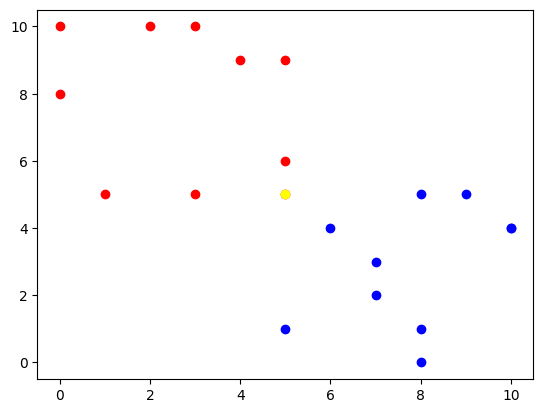

I'm instance of A class


In [6]:
generator = Generator()
dotsCount = 10
k = 3
c = C(5, 5)
dotsAList = generator.generateAList(dotsCount)
dotsBList = generator.generateBList(dotsCount)
renderer = Renderer(dotsAList, dotsBList, c, k)

print(c.determinator)

definer = ClassDefiner(dotsAList, dotsBList)
definer.defineClass(k, c)
renderer.drawDots()

print(c.determinator)